# 数据探索

导入数据科学相关库

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pandas的静态read_csv方法将csv文件读入成DataFrame格式（通俗理解成excel表格）

In [2]:
train=pd.read_csv("D:/train.csv")
test=pd.read_csv("D:/test.csv")

观察训练集，对数据有一个大致的认识，head方法查看前五行数据，info方法查看各列的数据类型及缺失值情况，
describe方法查看各列的一些基本的统计量（如方差、均值、最大值等），以训练集为例实践这些方法

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值在该列中有多少重复值
需要注意的是，value_counts()是Series所拥有的方法，在DataFrame中使用时，需要指定对哪一列或行使用
对Survived一列所在的数据值得分布感兴趣，故

In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

pandas的drop方法默认删除行，列需要指明参数axis=1
corr方法计算列与列之间的相关系数
cov方法计算列与列之间的协方差

In [7]:
train_corr = train.drop('PassengerId',axis=1).corr()

In [8]:
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


对相关系数矩阵用seaborn库heatmap方法进行可视化（不是必要的，只是为了更加直观）
heatmap的使用及相关参数可以用时查阅相关文档

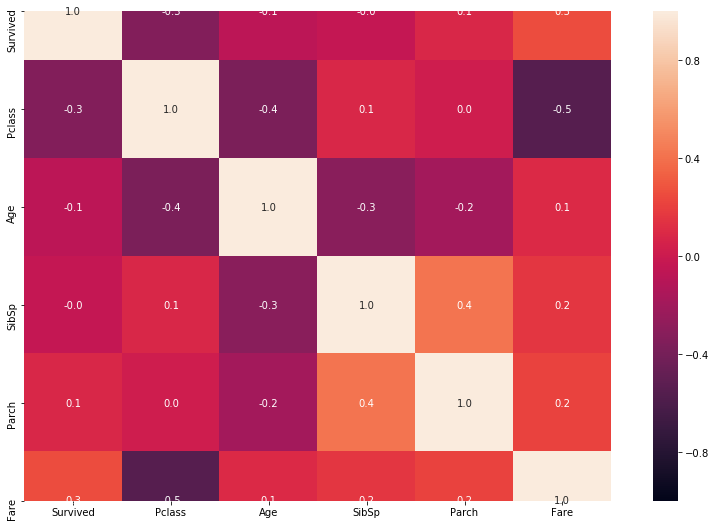

In [9]:
a=plt.subplots(figsize=(15,9))
a=sns.heatmap(train_corr,vmin=-1,vmax=1,annot=True,square=True,fmt='.1f')

groupby('x')方法实现将一个DataFrame按照列索引x的值不同进行分组
值得注意的是分组的结果是DataFrameGroupBy类型的对象，在pandas中是不可见的
可以在DataFrameGroupBy上继续挑选感兴趣的列(Series)运用mean、std的方法进行有针对性的分析
如下，想要了解舱的等级、性别等对生存率的影响，故

In [10]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

plot.bar()绘制柱状图

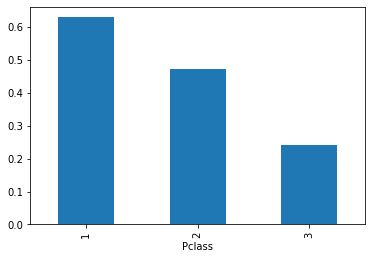

In [11]:
train.groupby('Pclass')['Survived'].mean().plot.bar()

In [12]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

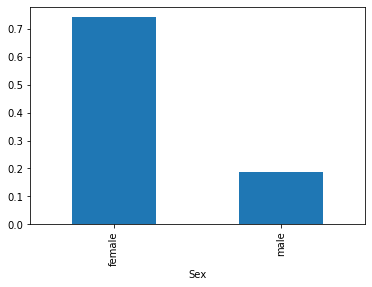

In [13]:
train.groupby('Sex')['Survived'].mean().plot.bar()

In [14]:
train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [15]:
train.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

上述的groupy操作主要针对离散的取值，对于连续取值的情况，知道一个个孤立的离散值是无意义的
更加关心的一个问题是其位于不同区间的值分布情况，可以配合使用FacetGrid与map方法
FacetGrid中的col参数是网格分类的对象，可以理解成离散情况下groupby的参数
map可以指定画图的类型（hist、scatter等），以及所感兴趣的对象作为横轴（可以理解成groupby后面紧跟的Series）
FacetGrid还可以通过指定hue等参数完成更高维度数据的可视化，相关操作已收藏在CSDN，方便后续查阅

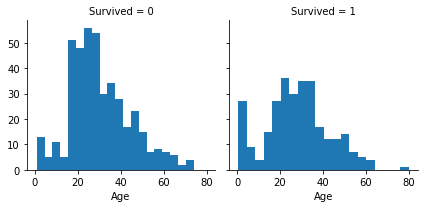

In [16]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

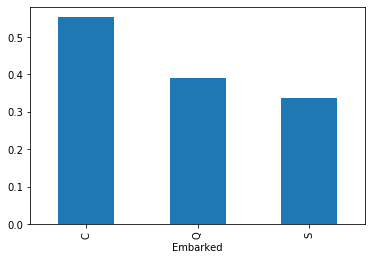

In [17]:
train.groupby('Embarked')['Survived'].mean().plot.bar()

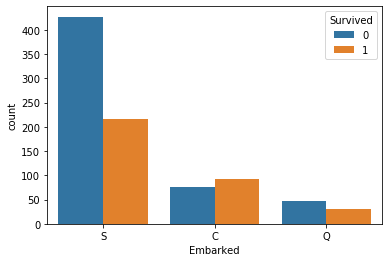

In [18]:
sns.countplot(x='Embarked',hue='Survived',data=train)

# 特征工程

进行训练集与测试集的拼接

In [19]:
test['Survived'] = 0
train_test = train.append(test,sort=False)

In [20]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


pandas的get_dummies方法将指定的列转化成独热编码，适用于把文本信息转换成数字信息，
以便构建特征

In [21]:
train_test=pd.get_dummies(train_test,columns=['Pclass'])

In [22]:
train_test.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [23]:
train_test=pd.get_dummies(train_test,columns=['Sex'])

In [24]:
train_test.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


SibSp与Parch均是亲属属性，可将其合并

In [25]:
train_test['SibSp_Parch']=train_test['SibSp']+train_test['Parch']

In [26]:
train_test=pd.get_dummies(train_test,columns=['SibSp_Parch'])
train_test.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Sex_male,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,...,1,0,1,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,1,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,0,1,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,...,0,0,1,0,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,...,1,1,0,0,0,0,0,0,0,0


In [27]:
train_test.drop('SibSp',axis=1,inplace=True)

In [28]:
train_test.drop('Parch',axis=1,inplace=True)

In [29]:
train_test.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,...,Sex_male,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,0,0,...,1,1,0,0,0,0,0,0,0,0


In [30]:
train_test = pd.get_dummies(train_test,columns=["Embarked"])

这里将Name利用正则表达式提取出称谓：先生、小姐、女士等作为一个特征
是一个非常巧妙的特征处理手段！

In [31]:
train_test['Name']=train_test['Name'].str.extract('.+,(.+)')

In [32]:
train_test['Name']=train_test['Name'].str.extract( '^(.+?)\.')

In [33]:
train_test.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,...,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10,Embarked_C,Embarked_Q,Embarked_S
0,1,0,Mr,22.0,A/5 21171,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,Mrs,38.0,PC 17599,71.2833,C85,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,Miss,26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,Mrs,35.0,113803,53.1000,C123,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,Mr,35.0,373450,8.0500,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
train_test = pd.get_dummies(train_test,columns=['Name'])

In [35]:
train_test.head()

,PassengerId,Survived,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
0,1,0,22.0,A/5 21171,7.2500,NaN,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,PC 17599,71.2833,C85,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,113803,53.1000,C123,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,373450,8.0500,NaN,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


对于缺失值通常有以下几种处理方式
1.如果缺值的样本占总数比例极高，直接舍弃，因为如果作为特征加入的话，可能反倒带入noise，影响最后的结果
2.如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，把NaN作为一个新类别，加到类别特征中（即有无缺值作为一个新特征）
3.如果缺值的样本适中，而该属性为连续值特征属性，可以试着根据已有的值，用平均值等拟合一下数据，补充上

Fare只有一个缺失值，可采用平均值来拟合缺失项，
但要注意的是这里不要直接用全体数据的均值来拟合，
而应根据客舱等级、港口类型来填充（这样做的依据来自于先前得到的相关系数矩阵）

In [36]:
train_test.loc[train_test['Fare'].isnull()]

,PassengerId,Survived,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
152,1044,0,60.5,3701,NaN,NaN,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


groupby的column属性是列表则可创建多级索引

In [37]:
train.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [38]:
train_test['Fare'].fillna(14.644083,inplace=True)

将Ticket根据前缀英文分开

In [39]:
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [40]:
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

In [41]:
train_test.head()

,PassengerId,Survived,Age,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,1,0,22.0,7.2500,NaN,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,38.0,71.2833,C85,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,7.9250,NaN,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,35.0,53.1000,C123,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,35.0,8.0500,NaN,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


对Age缺失值的处理手段也很巧妙
将Age非缺失的数据作为训练集而Age缺失的数据作为测试集
训练集的标签即年龄，特征即除了年龄以外的属性
这就转化成了一个回归模型
在训练集上训练出模型之后
将其泛化填充到测试集上，用于处理NAN值

In [42]:
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])
train_test.head()

,PassengerId,Survived,Age,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,1,0,22.0,7.2500,NaN,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1,38.0,71.2833,C85,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,26.0,7.9250,NaN,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,C123,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,35.0,8.0500,NaN,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [43]:
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [44]:
missing_age_X_train.head()

,PassengerId,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,1,7.2500,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,71.2833,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,7.9250,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,53.1000,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


记得对数据做标准化处理，否则Age和Fare等数据可能对收敛速度造成极大的影响，甚至造成模型的不收敛

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

In [46]:
from sklearn import linear_model
lin = linear_model.BayesianRidge()
lin.fit(missing_age_X_train,missing_age_Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [47]:
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)
train_test.head()

,PassengerId,Survived,Age,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,1,0,22.0,7.2500,NaN,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1,38.0,71.2833,C85,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,26.0,7.9250,NaN,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,C123,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,35.0,8.0500,NaN,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [48]:
train_test['Cabin'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test,columns=['Cabin'])
train_test.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_Parch_0,...,age_nan_0.0,age_nan_1.0,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,22.0,7.2500,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,4,1,35.0,53.1000,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,5,0,35.0,8.0500,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0


# 模型训练与预测

使用标准化处理和随机森林模型进行预测

In [49]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=2,max_depth=6,oob_score=True)
rf.fit(train_data_X,train_data_Y)
rf.oob_score_

0.8125701459034792

In [52]:
test["Survived"] = rf.predict(test_data_X)
RF = test[['PassengerId','Survived']].set_index('PassengerId')
RF

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [53]:
RF.to_csv('RF1.csv')